<a href="https://colab.research.google.com/github/Blazer-007/MNIST-GAN/blob/master/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd "/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks/DCGAN"

/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks/DCGAN


In [2]:
pwd

'/content/drive/My Drive/Deep_Learning /Generative_Adversial_Networks/DCGAN'

In [3]:
ls

images/  models/


In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import tensorflow as tf 
print(tf.__version__)

1.15.2


In [6]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
import numpy as np

Using TensorFlow backend.


In [7]:
(X_Train,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(X_Train.shape)
X_Train = X_Train.reshape((*(X_Train.shape),1))
print(X_Train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [9]:
#Normalize the Data between -1 and 1
X_Train = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [10]:
NUM_EPOCHS = 100
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)
NOISE_DIM = 100
adam = Adam(lr=2e-4,beta_1=0.5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)       

In [12]:
#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trai

In [13]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [14]:
def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/dcgan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 111.105126 G loss: 116.948227
Epoch 2 D loss: 173.657773 G loss: 199.154575
Epoch 3 D loss: 164.353068 G loss: 204.007312
Epoch 4 D loss: 164.012412 G loss: 198.357224
Epoch 5 D loss: 164.587781 G loss: 194.397160
Epoch 6 D loss: 164.177479 G loss: 193.539331
Epoch 7 D loss: 163.563052 G loss: 193.101556
Epoch 8 D loss: 162.960203 G loss: 193.903197
Epoch 9 D loss: 162.589934 G loss: 193.504979
Epoch 10 D loss: 162.239664 G loss: 193.652484


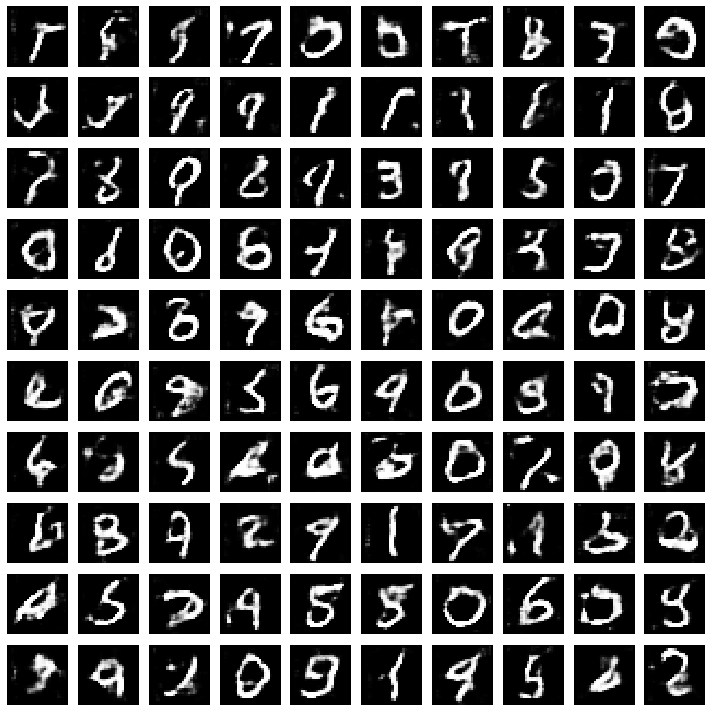

Epoch 11 D loss: 162.028828 G loss: 194.062641
Epoch 12 D loss: 161.792016 G loss: 194.286121
Epoch 13 D loss: 161.642675 G loss: 193.954736
Epoch 14 D loss: 161.466230 G loss: 194.838921
Epoch 15 D loss: 161.373148 G loss: 194.762751
Epoch 16 D loss: 161.510091 G loss: 192.820135
Epoch 17 D loss: 161.348866 G loss: 193.547391
Epoch 18 D loss: 161.042763 G loss: 196.694168
Epoch 19 D loss: 161.242603 G loss: 193.756761
Epoch 20 D loss: 160.908549 G loss: 196.610673


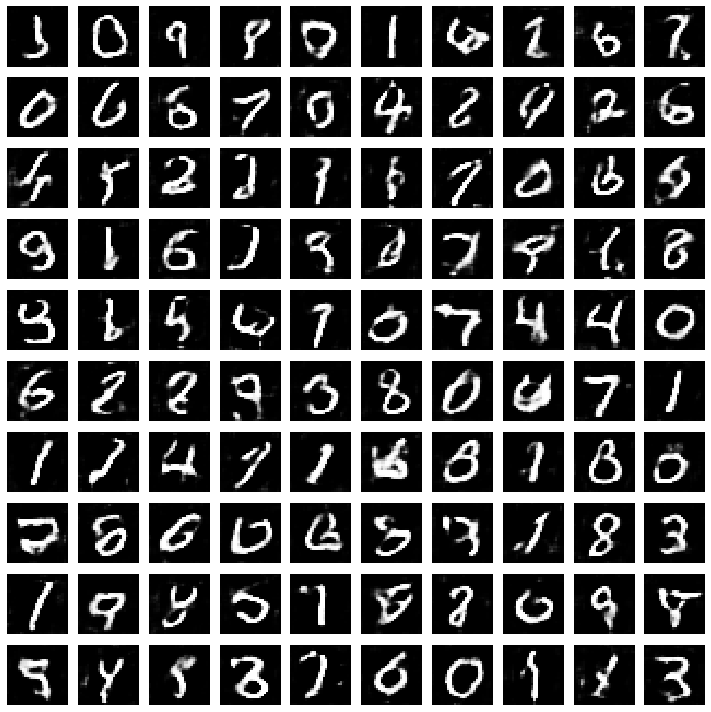

Epoch 21 D loss: 160.917219 G loss: 195.025260
Epoch 22 D loss: 160.945525 G loss: 194.706337
Epoch 23 D loss: 160.810636 G loss: 195.086372
Epoch 24 D loss: 160.152406 G loss: 201.688172
Epoch 25 D loss: 160.564680 G loss: 195.806253
Epoch 26 D loss: 160.407381 G loss: 196.349813
Epoch 27 D loss: 160.278453 G loss: 196.979627
Epoch 28 D loss: 159.690304 G loss: 202.721655
Epoch 29 D loss: 159.991294 G loss: 198.065053
Epoch 30 D loss: 159.756949 G loss: 198.980529


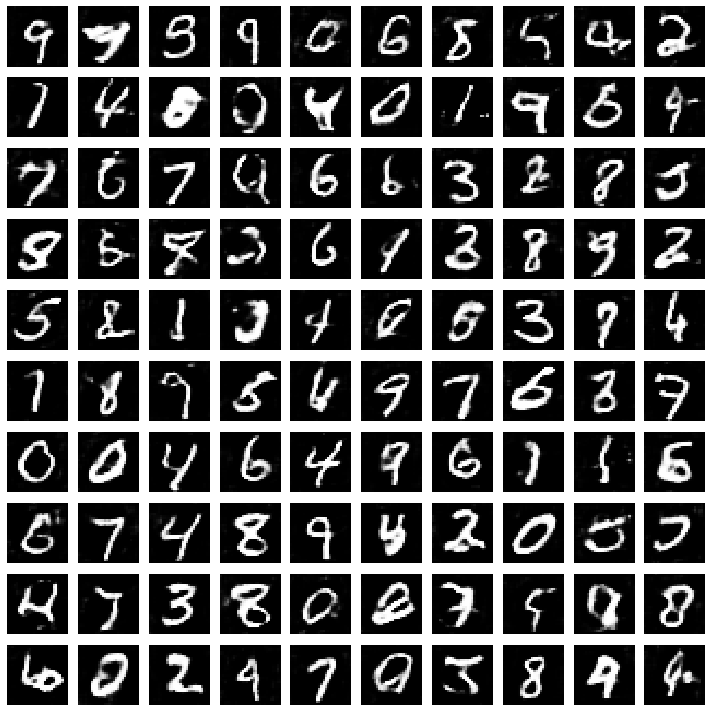

Epoch 31 D loss: 159.673515 G loss: 199.269703
Epoch 32 D loss: 159.562964 G loss: 200.409781
Epoch 33 D loss: 158.949313 G loss: 206.531171
Epoch 34 D loss: 159.101812 G loss: 200.754431
Epoch 35 D loss: 158.930462 G loss: 202.002337
Epoch 36 D loss: 158.860100 G loss: 202.921587
Epoch 37 D loss: 158.708550 G loss: 203.489542
Epoch 38 D loss: 158.546835 G loss: 204.513779
Epoch 39 D loss: 158.433793 G loss: 204.871376
Epoch 40 D loss: 158.125657 G loss: 205.752799


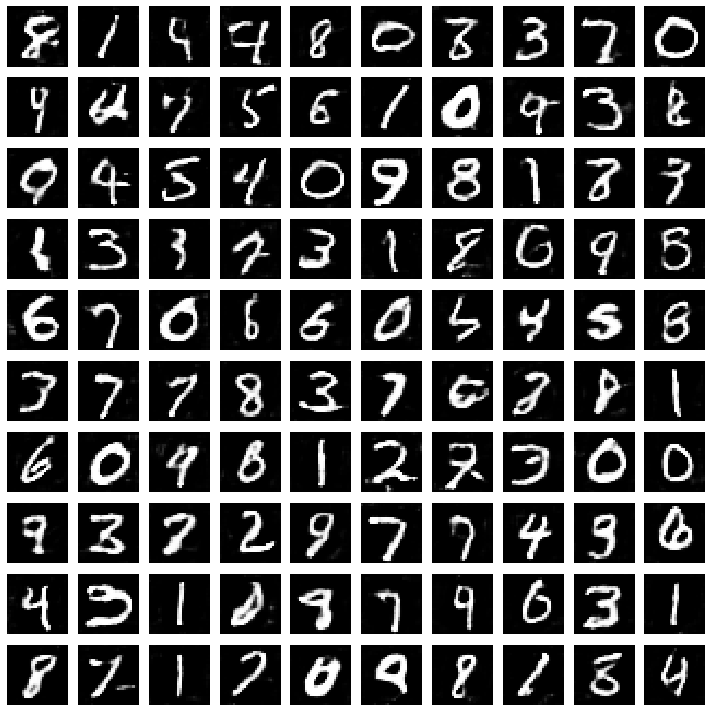

Epoch 41 D loss: 157.751558 G loss: 208.400243
Epoch 42 D loss: 157.595859 G loss: 207.983368
Epoch 43 D loss: 157.545856 G loss: 208.751025
Epoch 44 D loss: 157.247200 G loss: 209.682616
Epoch 45 D loss: 156.960228 G loss: 210.191662
Epoch 46 D loss: 156.684219 G loss: 212.131594
Epoch 47 D loss: 156.451848 G loss: 214.431964
Epoch 48 D loss: 156.387224 G loss: 213.613747
Epoch 49 D loss: 156.179206 G loss: 214.965851
Epoch 50 D loss: 155.962738 G loss: 215.678555


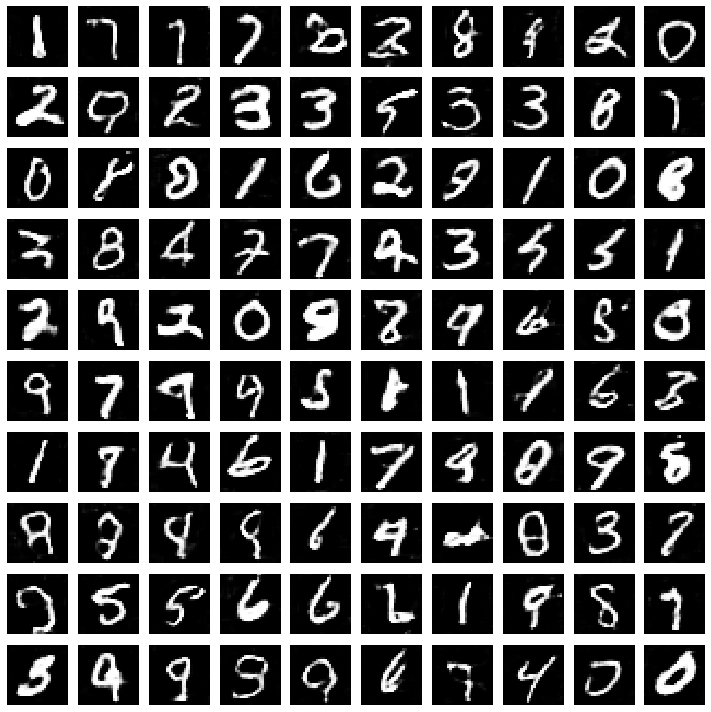

Epoch 51 D loss: 155.608708 G loss: 216.648293
Epoch 52 D loss: 155.404177 G loss: 217.368151
Epoch 53 D loss: 155.155505 G loss: 218.314421
Epoch 54 D loss: 154.940303 G loss: 219.833299
Epoch 55 D loss: 154.533943 G loss: 221.488277
Epoch 56 D loss: 154.120035 G loss: 222.288767
Epoch 57 D loss: 154.162009 G loss: 224.210306
Epoch 58 D loss: 153.804960 G loss: 224.507913
Epoch 59 D loss: 153.339290 G loss: 226.236479
Epoch 60 D loss: 153.287222 G loss: 227.321090


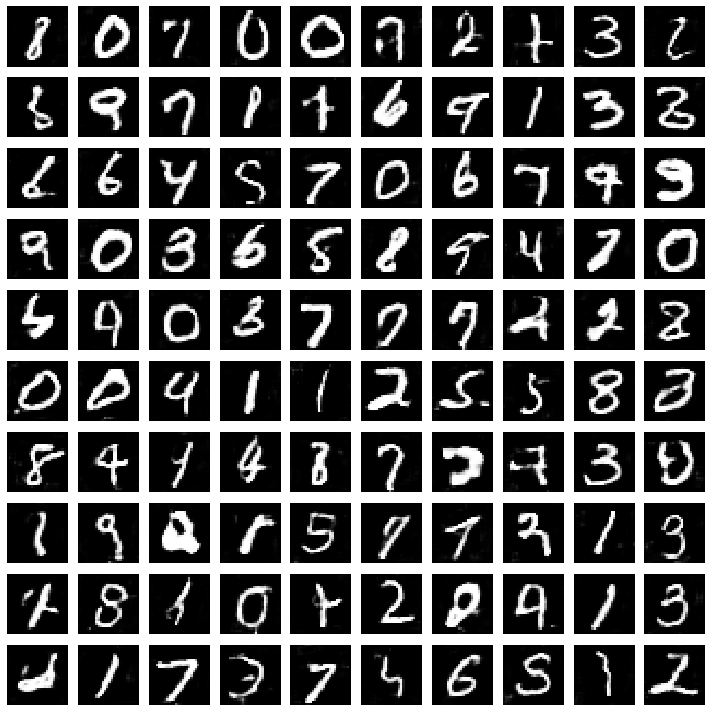

Epoch 61 D loss: 152.856575 G loss: 228.430908
Epoch 62 D loss: 152.780352 G loss: 229.445725
Epoch 63 D loss: 152.626383 G loss: 230.547358
Epoch 64 D loss: 152.092146 G loss: 233.011545
Epoch 65 D loss: 151.806127 G loss: 233.644286
Epoch 66 D loss: 151.674784 G loss: 235.039919
Epoch 67 D loss: 151.339743 G loss: 236.202671
Epoch 68 D loss: 151.294523 G loss: 238.214688
Epoch 69 D loss: 150.555370 G loss: 239.245864
Epoch 70 D loss: 150.576034 G loss: 239.880274


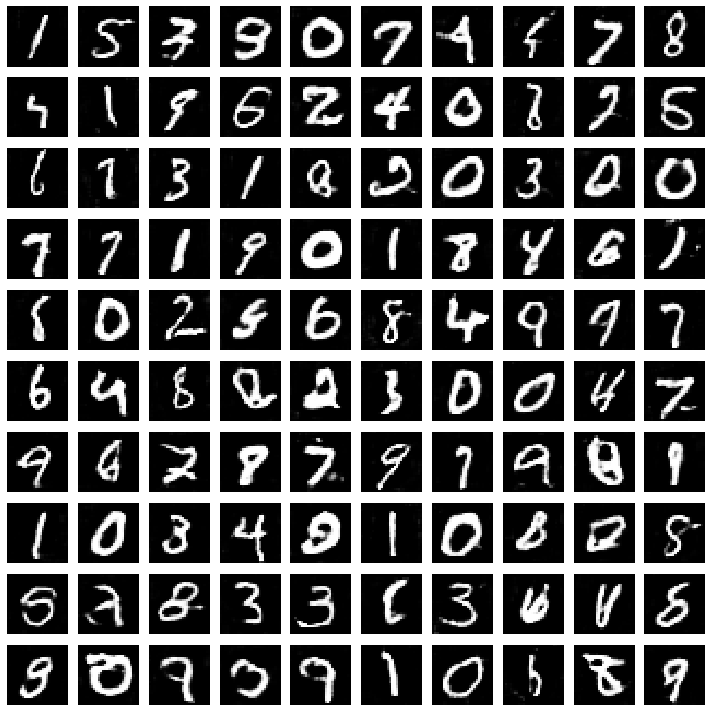

Epoch 71 D loss: 149.984922 G loss: 241.485877
Epoch 72 D loss: 149.675671 G loss: 243.144218
Epoch 73 D loss: 149.587054 G loss: 245.131285
Epoch 74 D loss: 149.219726 G loss: 246.756434
Epoch 75 D loss: 148.739652 G loss: 247.675456
Epoch 76 D loss: 148.658929 G loss: 249.338998
Epoch 77 D loss: 148.130149 G loss: 250.602803
Epoch 78 D loss: 147.796490 G loss: 252.073753
Epoch 79 D loss: 147.756368 G loss: 253.534407
Epoch 80 D loss: 147.207803 G loss: 255.135987


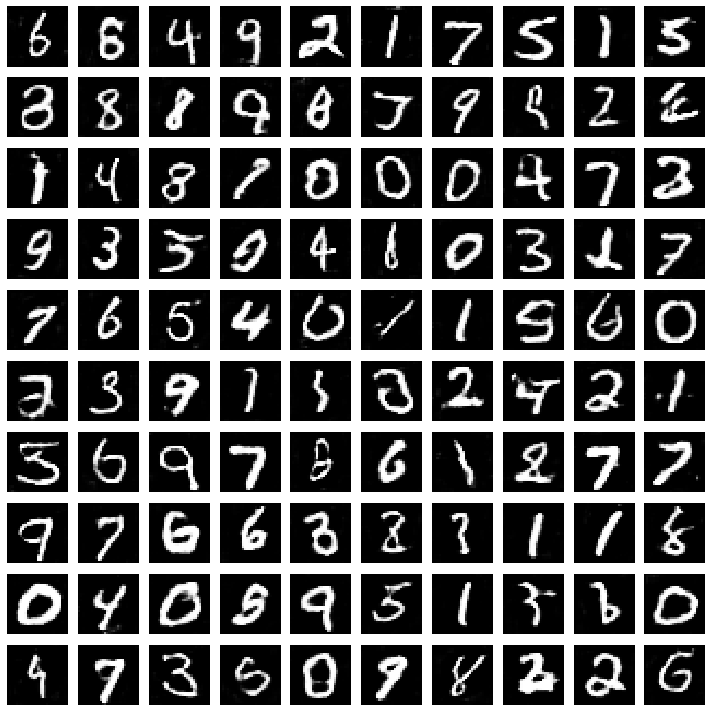

Epoch 81 D loss: 146.985744 G loss: 256.617484
Epoch 82 D loss: 146.635826 G loss: 258.053455
Epoch 83 D loss: 146.666845 G loss: 260.106692
Epoch 84 D loss: 146.187988 G loss: 260.602870
Epoch 85 D loss: 145.816421 G loss: 263.324975
Epoch 86 D loss: 145.795232 G loss: 264.745555
Epoch 87 D loss: 145.299619 G loss: 264.628714
Epoch 88 D loss: 145.352057 G loss: 267.388842
Epoch 89 D loss: 144.726381 G loss: 268.250205
Epoch 90 D loss: 144.757055 G loss: 269.184135


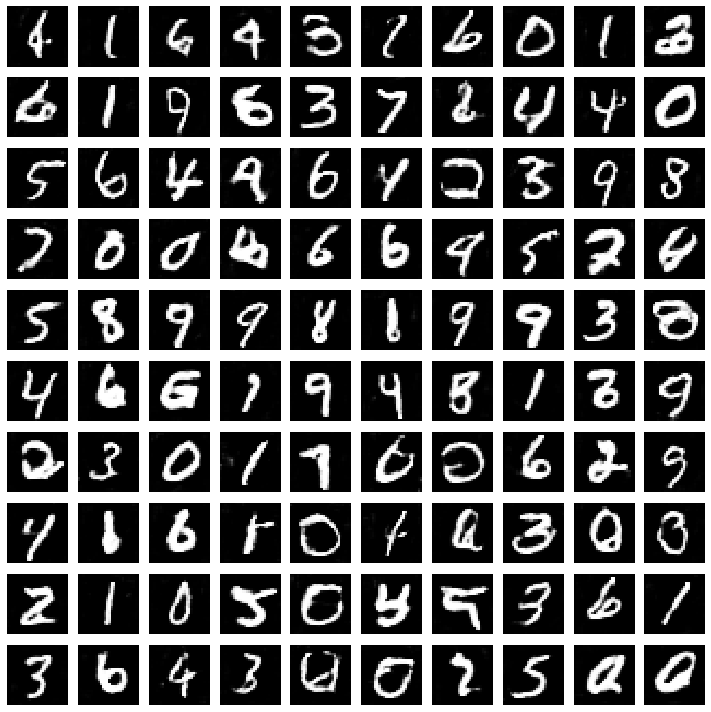

Epoch 91 D loss: 144.140523 G loss: 271.155823
Epoch 92 D loss: 144.116723 G loss: 272.444072
Epoch 93 D loss: 143.942947 G loss: 274.322280
Epoch 94 D loss: 143.234379 G loss: 275.797239
Epoch 95 D loss: 143.263749 G loss: 277.485626
Epoch 96 D loss: 142.852886 G loss: 278.367948
Epoch 97 D loss: 142.375499 G loss: 281.285359
Epoch 98 D loss: 142.267280 G loss: 282.333980
Epoch 99 D loss: 142.143649 G loss: 282.667724
Epoch 100 D loss: 141.759734 G loss: 284.868684


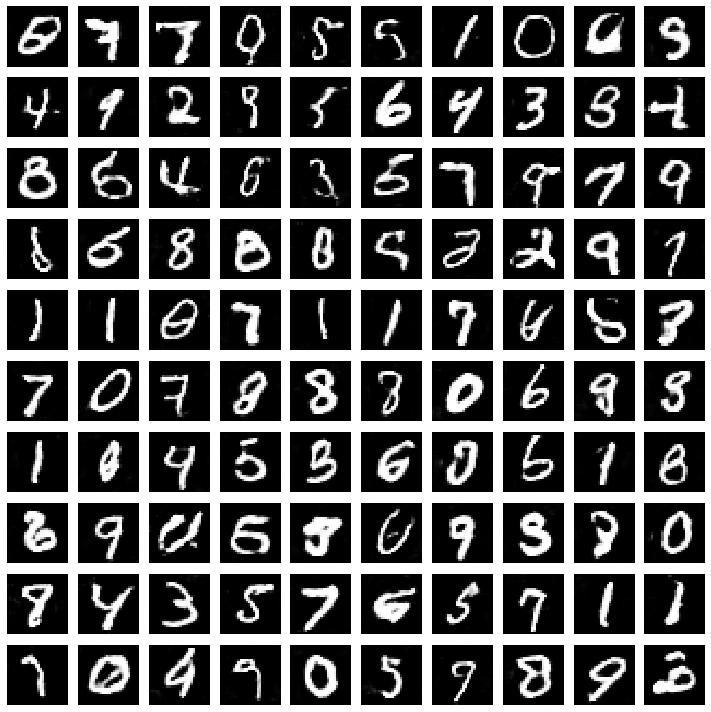

In [15]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss

        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/dcgan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)

# TransposeConv DCGAN
- here we will use Learnable UpSampling in generator part code 
- [Transpose Conv](https://medium.com/activating-robotic-minds/up-sampling-with-transposed-convolution-9ae4f2df52d0)

In [16]:
# Learnable Upsampling by Using Transpose Convolution

# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
#generator.add(UpSampling2D())
#generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(Conv2DTranspose(64, kernel_size=(5,5), strides=(2, 2), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
#generator.add(UpSampling2D())
#generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
generator.add(Conv2DTranspose(1, kernel_size=(5,5), strides=(2, 2), padding='same',activation='tanh'))
                
                
# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)       

In [17]:
#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [18]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [19]:
def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/dcgan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 129.684245 G loss: 262.926707
Epoch 2 D loss: 146.268674 G loss: 283.620617
Epoch 3 D loss: 138.080792 G loss: 281.548941
Epoch 4 D loss: 156.537264 G loss: 240.431071
Epoch 5 D loss: 157.352203 G loss: 233.072562
Epoch 6 D loss: 157.723070 G loss: 229.119759
Epoch 7 D loss: 157.385467 G loss: 226.957009
Epoch 8 D loss: 156.904300 G loss: 226.360025
Epoch 9 D loss: 156.241247 G loss: 226.719891
Epoch 10 D loss: 156.030474 G loss: 228.625870
Epoch 11 D loss: 155.841808 G loss: 227.615370
Epoch 12 D loss: 155.435788 G loss: 227.851020
Epoch 13 D loss: 155.493935 G loss: 230.172296
Epoch 14 D loss: 155.368685 G loss: 228.512839
Epoch 15 D loss: 155.252770 G loss: 229.081599
Epoch 16 D loss: 155.466418 G loss: 229.408246
Epoch 17 D loss: 155.290622 G loss: 230.057058
Epoch 18 D loss: 155.230954 G loss: 229.901205
Epoch 19 D loss: 154.918964 G loss: 231.010034
Epoch 20 D loss: 155.027889 G loss: 230.723570
Epoch 21 D loss: 154.897825 G loss: 232.004084
Epoch 22 D loss: 154.8

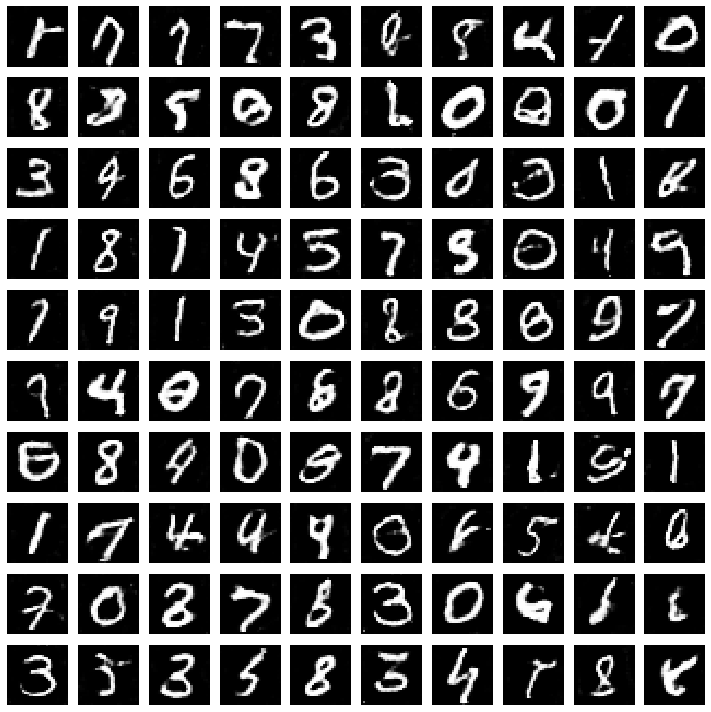

Epoch 51 D loss: 151.247701 G loss: 249.043163
Epoch 52 D loss: 151.297263 G loss: 250.645318
Epoch 53 D loss: 150.976027 G loss: 252.295000
Epoch 54 D loss: 150.980949 G loss: 251.813534
Epoch 55 D loss: 150.671313 G loss: 252.227219
Epoch 56 D loss: 150.741013 G loss: 253.149973
Epoch 57 D loss: 150.402378 G loss: 253.987908
Epoch 58 D loss: 150.647618 G loss: 254.911340
Epoch 59 D loss: 150.488283 G loss: 255.285749
Epoch 60 D loss: 150.304944 G loss: 255.580936
Epoch 61 D loss: 149.891099 G loss: 257.393244
Epoch 62 D loss: 150.058439 G loss: 256.874622
Epoch 63 D loss: 149.448097 G loss: 258.653162
Epoch 64 D loss: 149.914853 G loss: 259.347431
Epoch 65 D loss: 149.532178 G loss: 258.834189
Epoch 66 D loss: 149.578711 G loss: 260.683608
Epoch 67 D loss: 149.433972 G loss: 260.100813
Epoch 68 D loss: 148.975536 G loss: 261.385784
Epoch 69 D loss: 149.065478 G loss: 261.902133
Epoch 70 D loss: 149.143513 G loss: 262.048253
Epoch 71 D loss: 149.315734 G loss: 263.582510
Epoch 72 D lo

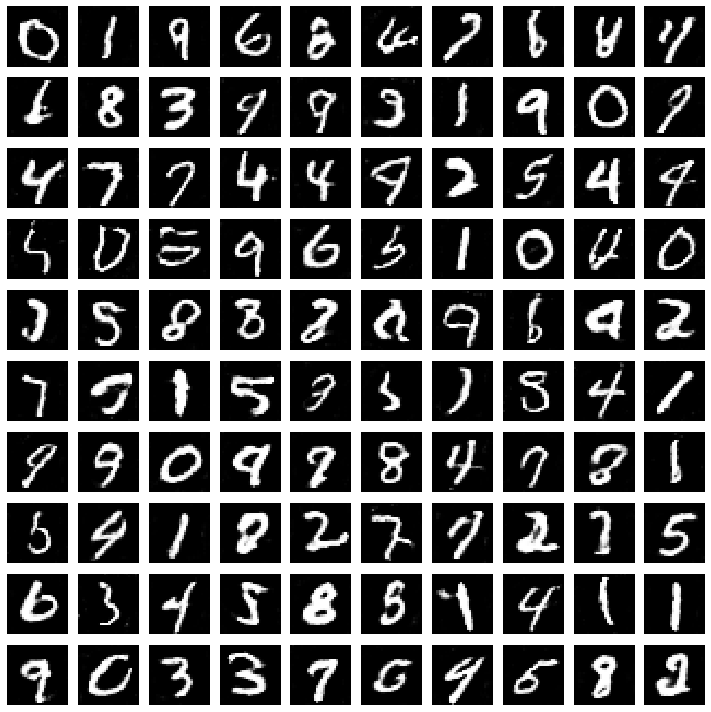

In [20]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss

        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%50==0:
        generator.save('models/dcgan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)